In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [24]:
weather = pd.read_csv("all_weather_by_hour_v2.csv")

In [25]:
weather

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,...,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,hour_icon,hour_source,hour_stations
0,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,0.0,91.5,0.0,NaN,0.0,10.0,Overcast,snow,obs,remote
1,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,0.2,88.2,0.0,NaN,0.0,10.0,Partially cloudy,fog,obs,remote
2,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,10.0,100.0,NaN,NaN,NaN,10.0,Overcast,cloudy,obs,33177099999
3,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,0.1,92.0,0.0,NaN,0.0,10.0,Overcast,fog,obs,remote
4,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,0.0,93.8,0.0,NaN,0.0,10.0,Overcast,cloudy,obs,remote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182707,49.2336,28.4486,"Вінниця, Україна","Vinnytsia,Ukraine",Europe/Kiev,2.0,2023-01-20,1674165600,11.2,5.7,...,24.1,100.0,0.0,NaN,0.0,10.0,Overcast,cloudy,obs,remote
182708,49.2336,28.4486,"Вінниця, Україна","Vinnytsia,Ukraine",Europe/Kiev,2.0,2023-01-20,1674165600,11.2,5.7,...,10.0,30.0,0.0,NaN,0.0,10.0,Partially cloudy,partly-cloudy-night,obs,33562099999
182709,49.2336,28.4486,"Вінниця, Україна","Vinnytsia,Ukraine",Europe/Kiev,2.0,2023-01-20,1674165600,11.2,5.7,...,24.1,100.0,0.0,NaN,0.0,10.0,Overcast,cloudy,obs,remote
182710,49.2336,28.4486,"Вінниця, Україна","Vinnytsia,Ukraine",Europe/Kiev,2.0,2023-01-20,1674165600,11.2,5.7,...,24.1,100.0,0.0,NaN,0.0,10.0,Overcast,cloudy,obs,remote


In [26]:
weather.columns

Index(['city_latitude', 'city_longitude', 'city_resolvedAddress',
       'city_address', 'city_timezone', 'city_tzoffset', 'day_datetime',
       'day_datetimeEpoch', 'day_tempmax', 'day_tempmin', 'day_temp',
       'day_feelslikemax', 'day_feelslikemin', 'day_feelslike', 'day_dew',
       'day_humidity', 'day_precip', 'day_precipprob', 'day_precipcover',
       'day_snow', 'day_snowdepth', 'day_windgust', 'day_windspeed',
       'day_winddir', 'day_pressure', 'day_cloudcover', 'day_visibility',
       'day_solarradiation', 'day_solarenergy', 'day_uvindex',
       'day_severerisk', 'day_sunrise', 'day_sunriseEpoch', 'day_sunset',
       'day_sunsetEpoch', 'day_moonphase', 'day_conditions', 'day_description',
       'day_icon', 'day_source', 'day_preciptype', 'day_stations',
       'hour_datetime', 'hour_datetimeEpoch', 'hour_temp', 'hour_feelslike',
       'hour_humidity', 'hour_dew', 'hour_precip', 'hour_precipprob',
       'hour_snow', 'hour_snowdepth', 'hour_preciptype', 'hour_windg

In [27]:
weather["day_datetime"] = pd.to_datetime(weather.day_datetime)

In [28]:
precipitation_day = weather.groupby(['day_datetime', 'city_address'])['day_precip'].mean().reset_index()
precipitation_day.set_index("day_datetime", inplace=True)
precipitation_day

,city_address,day_precip
day_datetime,,
2022-02-24,"Cherkasy,Ukraine",0.000
2022-02-24,"Chernihiv,Ukraine",0.300
2022-02-24,"Chernivtsi,Ukraine",0.008
2022-02-24,"Dnipro,Ukraine",0.000
2022-02-24,"Donetsk,Ukraine",1.300
...,...,...
2023-01-20,"Ternopil,Ukraine",6.000
2023-01-20,"Uzhgorod,Ukraine",5.604
2023-01-20,"Vinnytsia,Ukraine",0.600


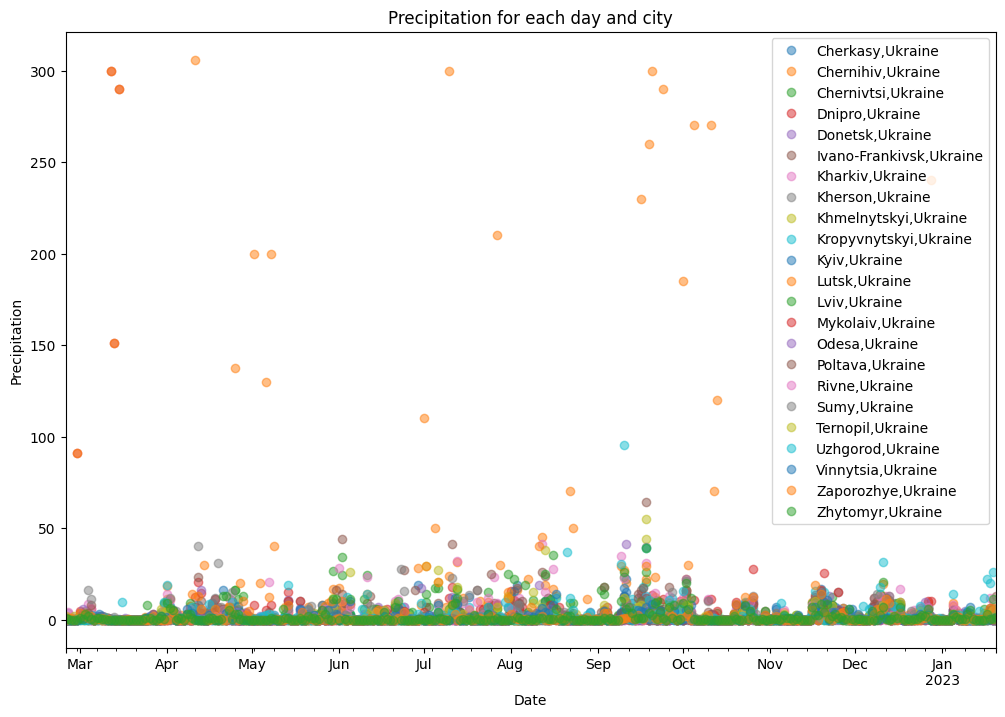

In [29]:
plt.figure(figsize=(12, 8))
ax = precipitation_day.groupby('city_address')['day_precip'].plot(style='o', alpha=0.5, legend=True)

plt.title("Precipitation for each day and city")
plt.xlabel("Date")
plt.ylabel("Precipitation")

plt.show()

In [30]:
precipitation_day

,city_address,day_precip
day_datetime,,
2022-02-24,"Cherkasy,Ukraine",0.000
2022-02-24,"Chernihiv,Ukraine",0.300
2022-02-24,"Chernivtsi,Ukraine",0.008
2022-02-24,"Dnipro,Ukraine",0.000
2022-02-24,"Donetsk,Ukraine",1.300
...,...,...
2023-01-20,"Ternopil,Ukraine",6.000
2023-01-20,"Uzhgorod,Ukraine",5.604
2023-01-20,"Vinnytsia,Ukraine",0.600


In [31]:
temperature_day = weather.groupby(['day_datetime', 'city_address'])['day_temp'].mean().reset_index()
temperature_day.set_index("day_datetime", inplace=True)
temperature_day

,city_address,day_temp
day_datetime,,
2022-02-24,"Cherkasy,Ukraine",1.9
2022-02-24,"Chernihiv,Ukraine",2.4
2022-02-24,"Chernivtsi,Ukraine",3.4
2022-02-24,"Dnipro,Ukraine",3.1
2022-02-24,"Donetsk,Ukraine",3.6
...,...,...
2023-01-20,"Ternopil,Ukraine",2.0
2023-01-20,"Uzhgorod,Ukraine",1.7
2023-01-20,"Vinnytsia,Ukraine",7.9


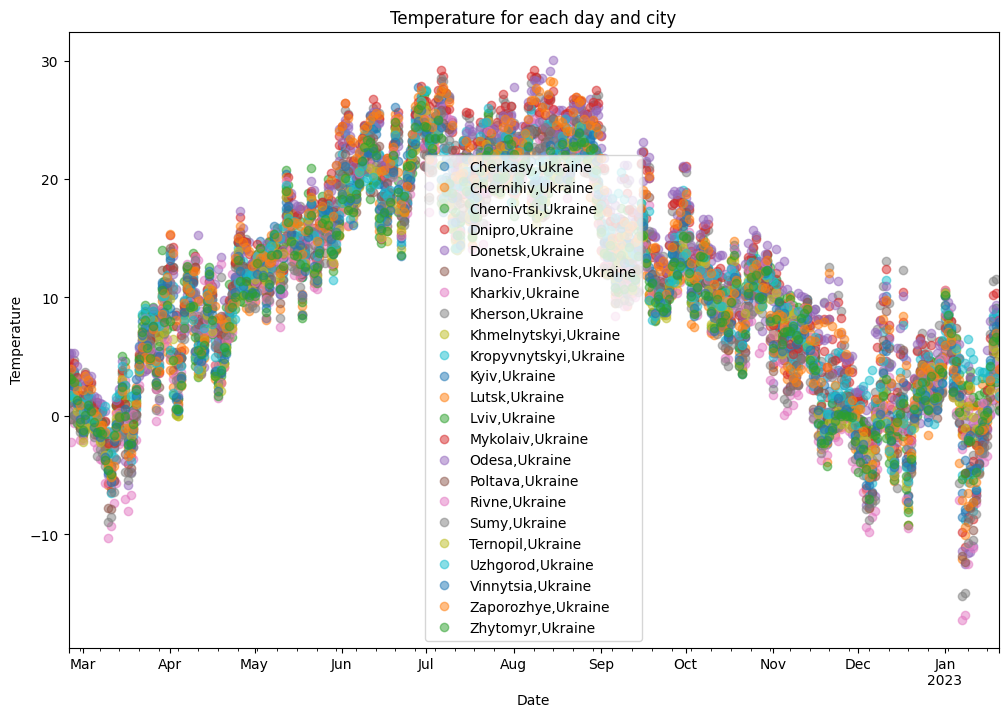

In [32]:
plt.figure(figsize=(12, 8))
ax1 = temperature_day.groupby('city_address')['day_temp'].plot(style='o', alpha=0.5, legend=True)

plt.title("Temperature for each day and city")
plt.xlabel("Date")
plt.ylabel("Temperature")

plt.show()

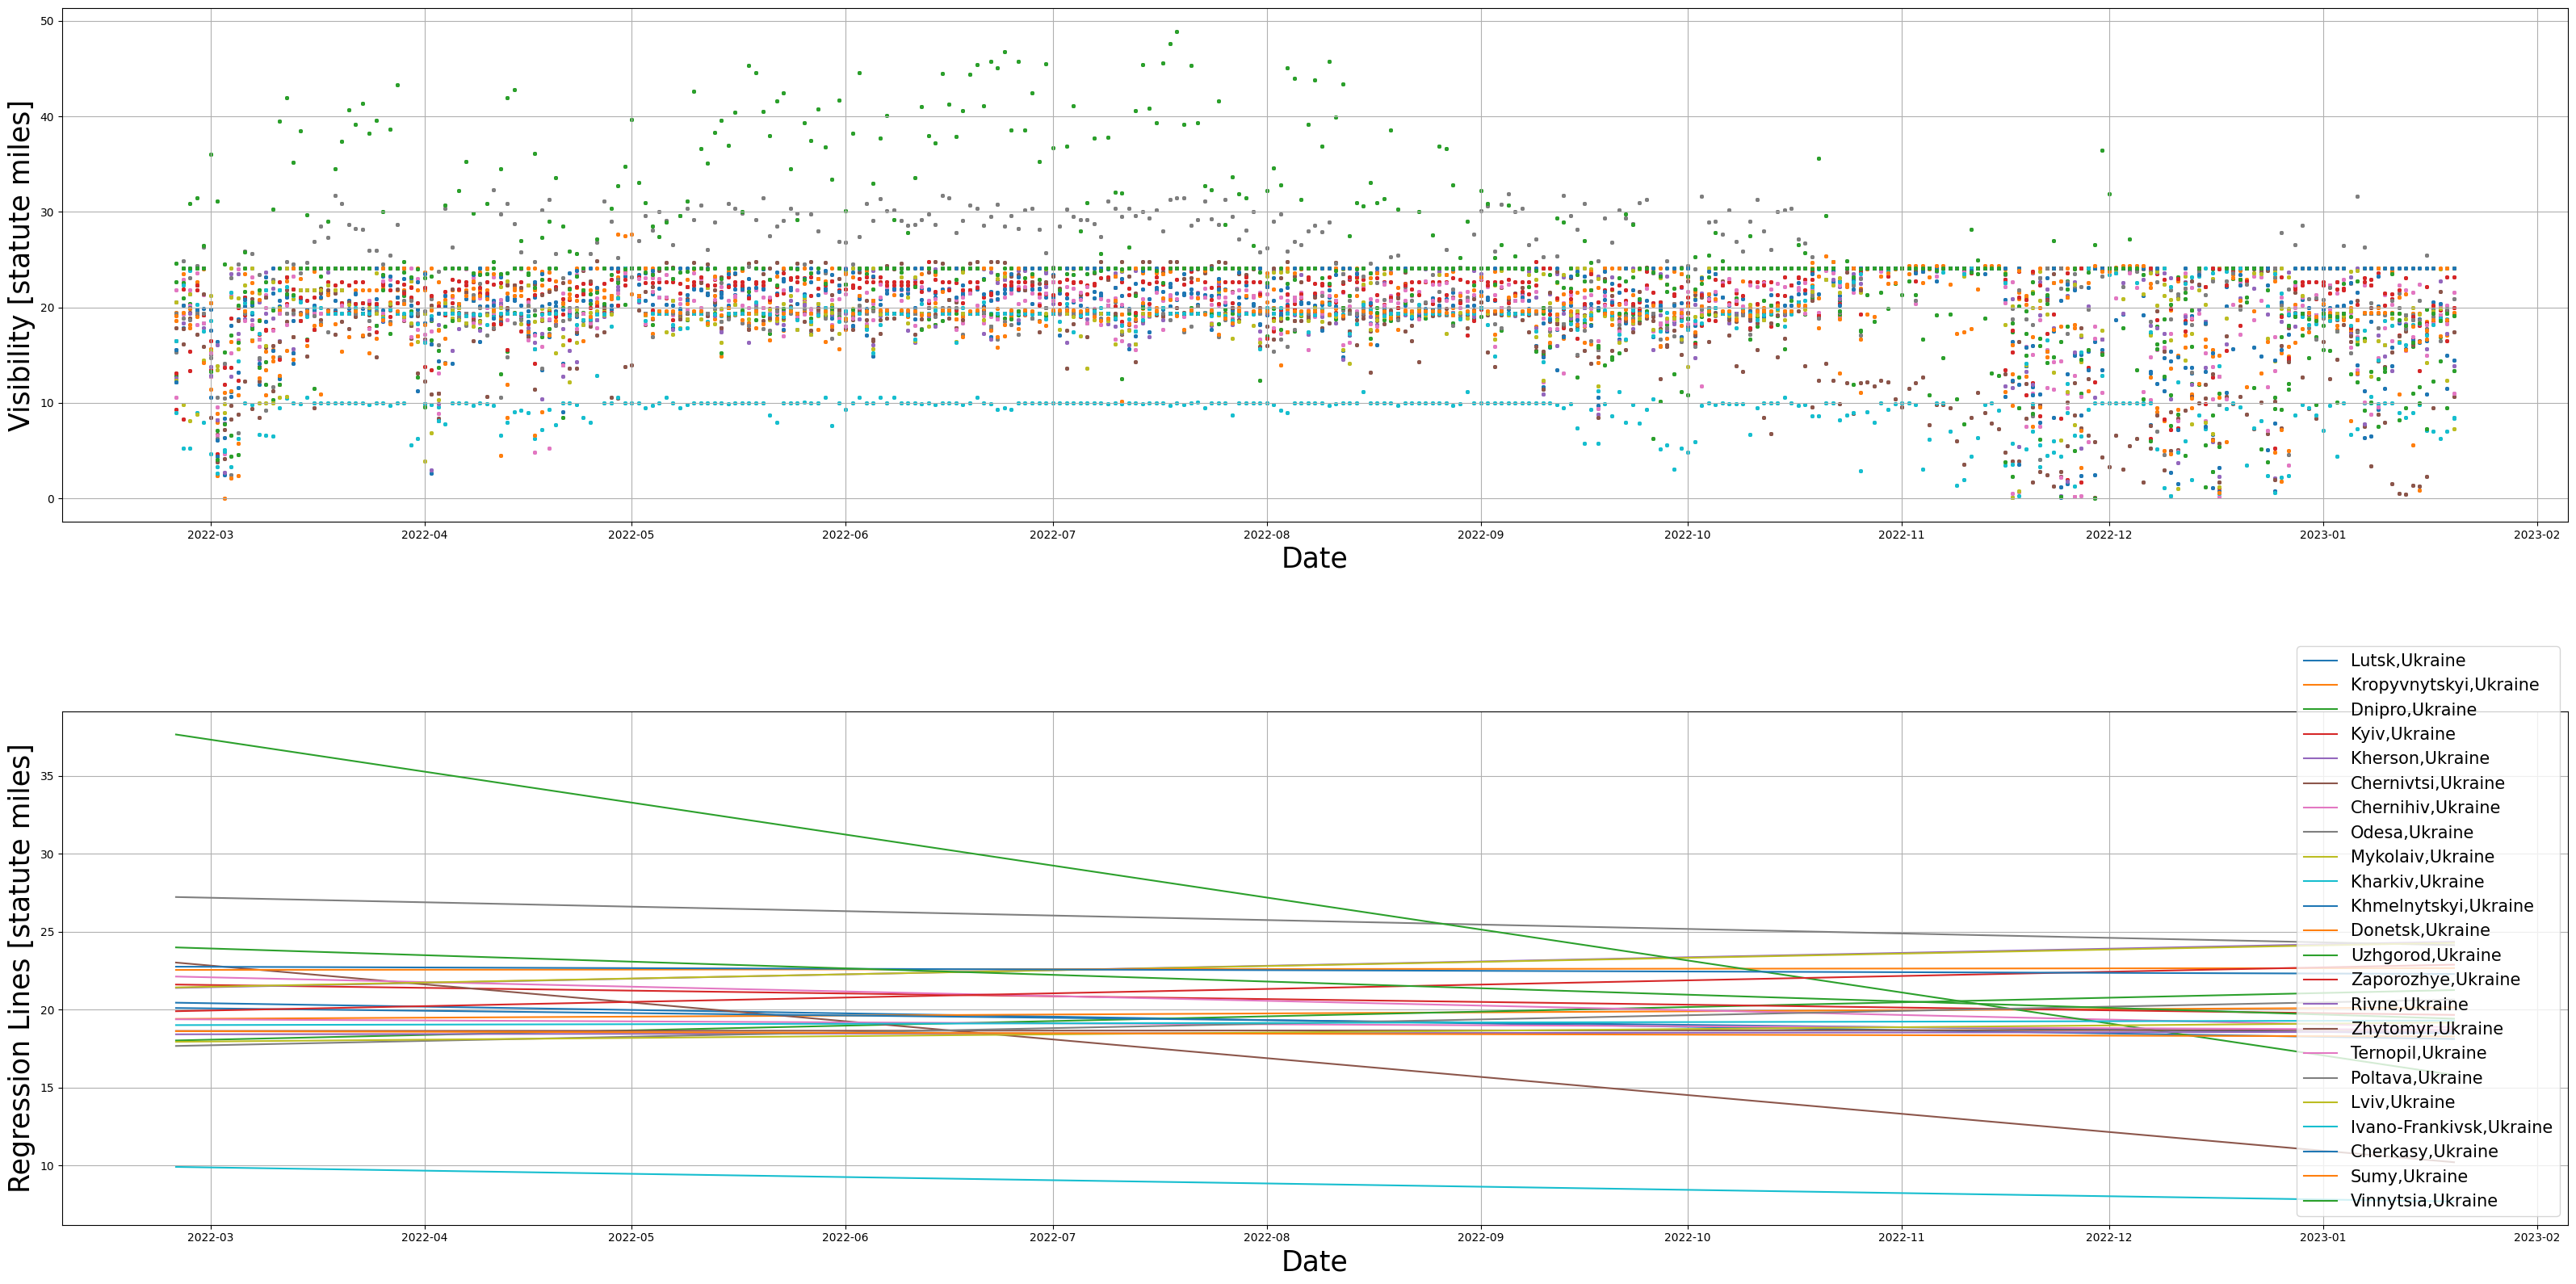

In [33]:
def plot_visibility_changes(df: pd.DataFrame) -> None:

    df['day_datetime'] = pd.to_datetime(df['day_datetime'])

    main_plot = plt.figure(figsize=(32, 16))
    ax1 = main_plot.add_subplot(211)
    ax2 = main_plot.add_subplot(212)

    for city_address in df['city_address'].unique():
        df_city = df[df['city_address'] == city_address].reset_index()
        dates = df_city['day_datetime'].map(datetime.toordinal)
        gradient, offset = np.polyfit(dates, df_city['day_visibility'], deg=1)
        ax1.scatter(df_city['day_datetime'], df_city['day_visibility'], label=city_address, s=5)
        ax2.plot(df_city['day_datetime'], gradient * dates + offset, label=city_address)
    ax1.grid()
    ax2.grid()
    ax2.legend(loc="lower right", prop={'size': 15})
    ax2.set_ylabel("Regression Lines [statute miles]", fontsize=25)

    ax1.set_ylabel("Visibility [statute miles]", fontsize=25)
    ax1.set_xlabel("Date", fontsize=25)
    ax2.set_xlabel("Date", fontsize=25)
    plt.tight_layout()
    plt.show()

plot_visibility_changes(weather)